# Data Analysis

In [12]:
#import

import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [13]:
airbnb  = pd.read_csv('/Users/shuyi/2017Fall/BD/Project/proposal/airbnb/train_users_2.csv')
test    = pd.read_csv('/Users/shuyi/2017Fall/BD/Project/proposal/airbnb/test_users.csv')

In [14]:
airbnb.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [15]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [16]:
airbnb = airbnb.drop(['date_account_created','timestamp_first_active'], axis=1)
airbnb.head()

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Destination, Gender, Age, Date

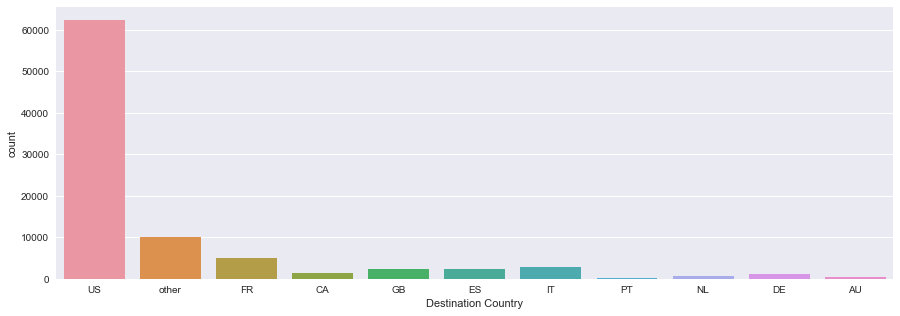

In [40]:
# destination

# drop the rows with country_destination = NDF

airbnb_country = airbnb[(True^airbnb['country_destination'].isin(['NDF']))]

# the frequency for country destination

fig, (axes) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_country, ax=axes)
plt.xlabel('Destination Country')
plt.show()

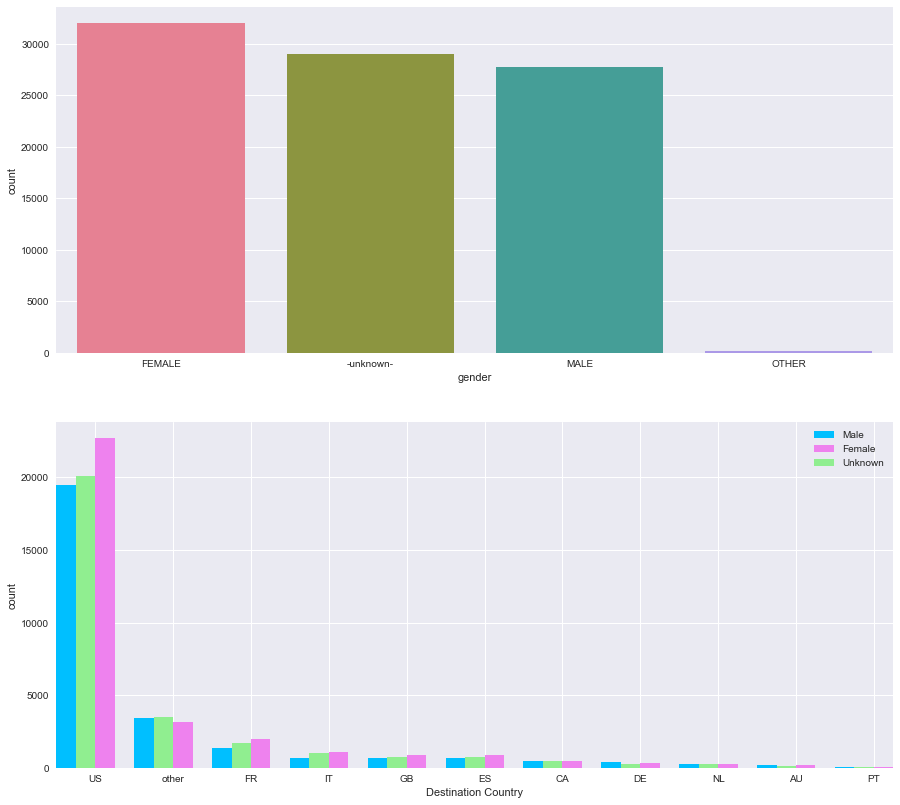

In [41]:
# gender

fig, axes = plt.subplots(2,1,figsize=(15,14))
sns.countplot(x='gender', data=airbnb_country, palette='husl',ax=axes[0])


# gender distribution

male_destinations = airbnb_country.loc[airbnb_country['gender'] == 'MALE', 'country_destination'].value_counts()
female_destinations = airbnb_country.loc[airbnb_country['gender'] == 'FEMALE', 'country_destination'].value_counts()
unknown_destinations = airbnb_country.loc[airbnb_country['gender'] == '-unknown-', 'country_destination'].value_counts()

male_destinations.plot(kind='bar', width=0.25, position=2, color='#00BFFF', label='Male', rot=0, ax=axes[1])
female_destinations.plot(kind='bar', width=0.25, position=0, color='#EE82EE', label='Female', rot=0, ax=axes[1])
unknown_destinations.plot(kind='bar', width=0.25, position=1, color='#90EE90', label='Unknown', rot=0, ax=axes[1])

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('count')

plt.show()

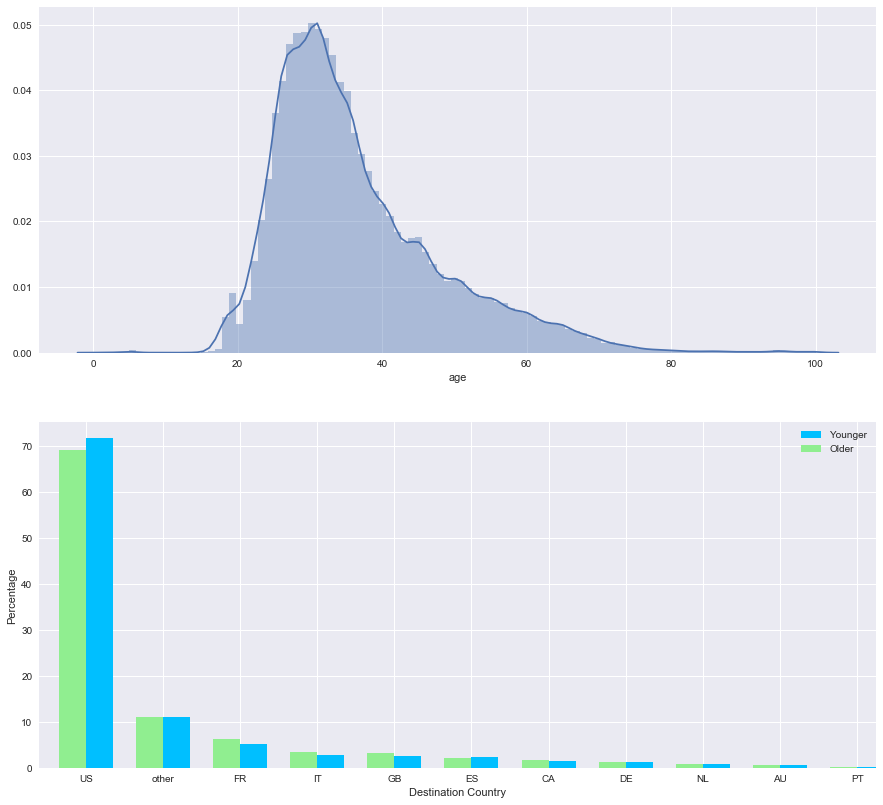

In [43]:
# age

airbnb_age = airbnb[airbnb['age']<=100]

fig, axes = plt.subplots(2,1,figsize=(15,14))
sns.distplot(airbnb_age.age, bins=100, kde=True, ax=axes[0])

# classify user into two groups: younger and older

younger = sum(airbnb_country.loc[airbnb_country['age'] <= 40, 'country_destination'].value_counts())
older = sum(airbnb_country.loc[airbnb_country['age'] > 40, 'country_destination'].value_counts())

younger_destinations = airbnb_country.loc[airbnb_country['age'] <= 40, 'country_destination'].value_counts() / younger * 100
older_destinations = airbnb_country.loc[airbnb_country['age'] > 40, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=0.35, position=0, color='#00BFFF', label='Younger', rot=0, ax=axes[1])
older_destinations.plot(kind='bar', width=0.35, position=1, color='#90EE90', label='Older', rot=0, ax=axes[1])

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

plt.show()


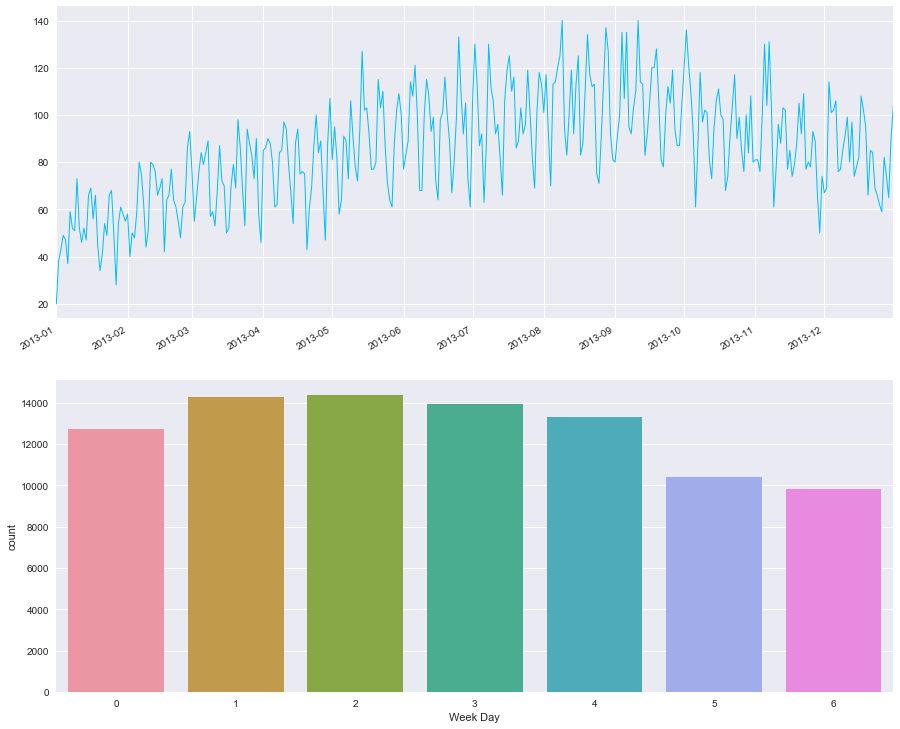

In [52]:
# date

# the whole timeline of 2013
fig, axes = plt.subplots(2,1,figsize=(15,14))

airbnb['date_first_booking']=pd.to_datetime(airbnb['date_first_booking'])

airbnb_2013 = airbnb.loc[airbnb['date_first_booking'] >= "2013-01-01"]
airbnb_2013 = airbnb_2013.loc[airbnb['date_first_booking'] < "2014-01-01"]

airbnb_2013.date_first_booking.value_counts().plot(kind='line', linewidth=1, color='#00BFFF',ax=axes[0])

# weekdays
weekdays = []
date_ser = pd.Series(airbnb['date_first_booking'])
for date in date_ser:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.countplot(x=weekdays.index, data=weekdays, order=range(0,7), ax=axes[1])
plt.xlabel('Week Day')
plt.ylabel('count')

plt.show()

In [11]:
airbnb.head()

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
